# <span style="color:red">  Esercitazione_03</span>

In [1]:
#Librerie necessarie

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### Informazioni utili:

- La cartella *<font color="blue">03.1</font>* contiene tutti i codici scritti per la realizzazione dell'esercitazione.
- Nella cartella *<font color="blue">Results</font>* sono già contenuti tutti i risultati di output. Questi ultimi sono quelli analizzati ed esposti in questo notebook e non è quindi necessaria la ricompilazione e la riesecuzione dei codici; nel caso si volessero rieffettuare le simulazioni è sufficiente digitare *"<font color="green">make run</font>"* da terminale. I codici sono strutturati in modo tale che una nuova compilazione vada automaticamente a sostituire i vecchi dati di output con quelli nuovi appena ottenuti.

## Esercizio 03.1

L'esercizio prevede l'implementazione di una simulazione Monte Carlo che permetta di valutare il prezzo di una *Call Option* e una *Put Option*. Questi due tipi di opzione fanno parte delle *European Option* le quali sono l'unico tipo di opzioni che possiedono una soluzione analitica per effettuare il loro princing. Il risultato analitico ci è offerto dalla teoria di Black & Scholes la quale assume che l'evoluzione temporale del prezzo di un prodotto finanziario $S(t)$ segua un *Moto Browniano Geometrico* (GBM) con un tasso di interesse privo di rischio $r$ e volatilità $\sigma$, entrambi costanti. 

Di seguito è riportata la soluzione analitica per il pricing di una *Call Option* e una *Put Option* per i segunti dati di mercato:
- asset price a $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

In [24]:
import scipy
from scipy.special import erf
from scipy import log, exp, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


Attraverso l'implementazione di una classe (*<font color="grey">Option.h, Option.cpp</font>*) è stata simulata l'evoluzione del prezzo di un asset $S(t)$ nel tempo attraverso il campionamento di un *Moto Browniano Geometrico* $GBM(r,\sigma^2)$ utilizzando la formula ricorsiva:

$$S(t_{i+1}) = S(t_i) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right] \quad \text{con} \quad Z_i \sim \mathcal{N}(0,1)\, .$$
    
Questo metodo è esatto poichè non vi sono errori di discretizzazione e di conseguenza la sequenza prodotta ha la stessa distribuzione di probabilità congiunta del $GBM$. 

Il codice prevede la possibilità di valutare il prezzo di una *call-option* $C\left[ S(t),t \right]$ e di una *put-option* $P\left[ S(t),t \right]$ in due maniere differenti:
1. Campionando **direttamente** il prezzo finale al *time to maturity* dell' asset $S(T)$
2. Campionando il cammino **discretizzato** del prezzo dell'asset $S(T)$ dividendo $[0,T]$ in $10^2$ intervelli temporali: $S(0)$, $S(t_1)$, $S(t_2)$, ... fino a $S(t_{100}=T=1)$

Sono state effettuate $M = 10^6$ simulazioni; successivamnete per ottenere il prezzo dell'asset è stato attualizzato il possibile profitto secondo le formule:

- $C\left[ S(T),T \right] = e^{-rT}\max\left[0,S(T)-K\right] \quad Call Option$
- $P\left[ S(T),T \right] = e^{-rT}\max\left[0,K-S(T)\right] \quad Put Option$

Di seguito sono riportati i grafici dei prezzi della *call-option* e della *put-option* in funzione del numero di simulazioni con i rispettivi errori (l'analisi dei dati è stata effettuata tramite il metodo del *data blocking*). In un unico grafico sono riportati i risulati ottenuti da entrambi i metodi di campionamento ed il risulato analitico per effettuare un confronto.

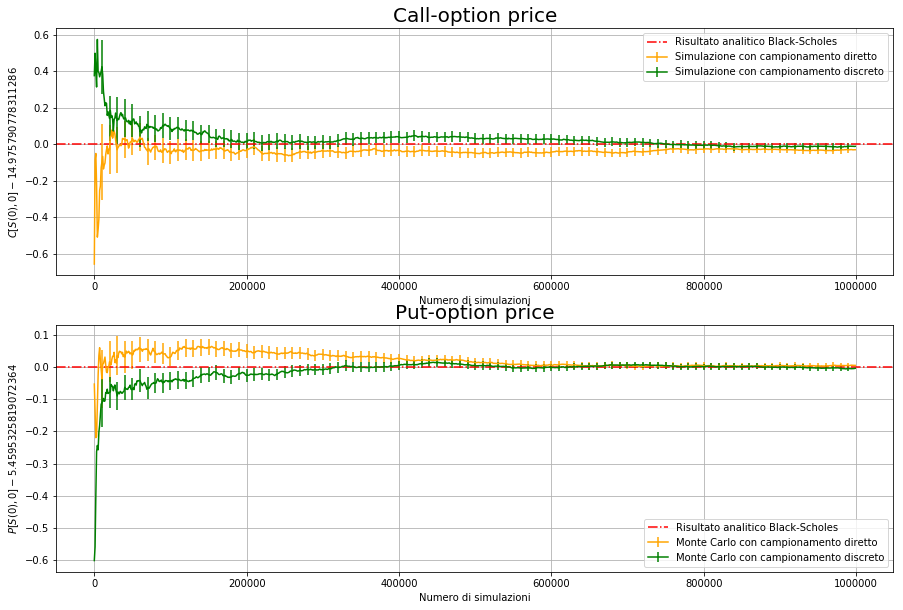

In [3]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
x, y, error = np.loadtxt('Results/ResultsCallDirectly.out', usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y - 14.975790778311286, yerr=error,errorevery = 10, label = 'Simulazione con campionamento diretto', color = 'orange')
plt.axhline(y=0,linestyle='-.',color = 'red',label = 'Risultato analitico Black-Scholes')
x, y, error = np.loadtxt('Results/ResultsCallDiscretized.out', usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y - 14.975790778311286, yerr=error,errorevery = 10,label = 'Simulazione con campionamento discreto',color = 'green')
plt.xlabel('Numero di simulazioni')
plt.ylabel('$C[S(0),0] - 14.975790778311286$')
plt.title('Call-option price', fontsize=20)
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
x, y, error = np.loadtxt('Results/ResultsPutDirectly.out', usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y - 5.4595325819072364, yerr=error,errorevery = 10, label = 'Monte Carlo con campionamento diretto', color = 'orange')
plt.axhline(y=0,linestyle='-.',color = 'red',label = 'Risultato analitico Black-Scholes')
x, y, error = np.loadtxt('Results/ResultsPutDiscretized.out', usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,y - 5.4595325819072364, yerr=error, errorevery = 10,label = 'Monte Carlo con campionamento discreto',color = 'green')
plt.xlabel('Numero di simulazioni')
plt.ylabel('$P[S(0),0] - 5.4595325819072364$')
plt.title('Put-option price', fontsize = 20)

plt.legend()
plt.grid(True)
plt.show()

Come si evince dai grafici entrambi i metodi utilizzati convergono alla soluzione analitica entro gli errori, però si può notare che il metodo del campionamento discreto mostra una migliore campatibilità con il risultato atteso.